In [2]:
import sys
sys.path.append("../../../..")
%load_ext autoreload
%autoreload 1
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker
import mplhep as hep
plt.style.use(hep.style.CMS)

import json

In [30]:
def convertToEpoch(data:list[list[int]], stepVal, epochVal):
    epochs = [x[1]*epochVal/stepVal for x in data]
    vals = [x[2] for x in data]
    return epochs, vals

In [31]:
def loadData(filename,stepVal, epochVal ):
    with open(f"json_data/{filename}.json", "r") as f:
        return convertToEpoch(json.load(f), stepVal, epochVal)

In [32]:
epoch_train, loss_train = loadData("training",  35359, 223)
epoch_val, loss_val = loadData("validation",  35359, 223)

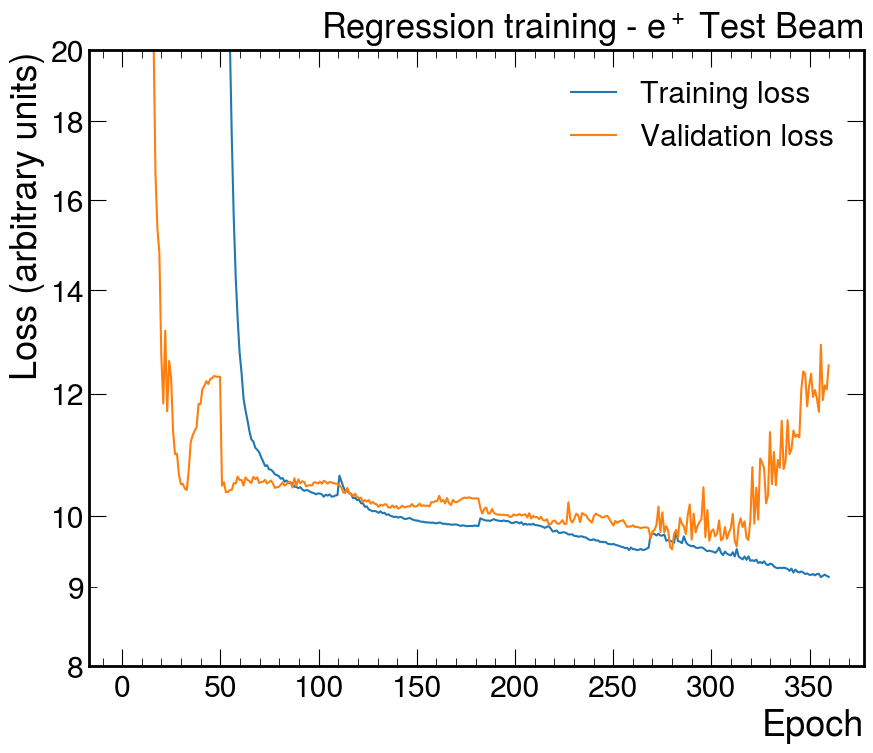

In [41]:
plt.figure(figsize=(10, 8))
plt.plot(epoch_train, loss_train, label="Training loss")
plt.plot(epoch_val, loss_val, label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (arbitrary units)")
plt.yscale("log")
hep.cms.lumitext("Regression training - $e^+$ Test Beam")
plt.ylim(8, 20)
plt.gca().get_yaxis().set_major_locator(matplotlib.ticker.AutoLocator())
plt.gca().get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.gca().get_yaxis().set_minor_formatter(matplotlib.ticker.ScalarFormatter())

plt.legend()
plt.savefig("../plots-results/loss-rechits-data.pdf", bbox_inches="tight")